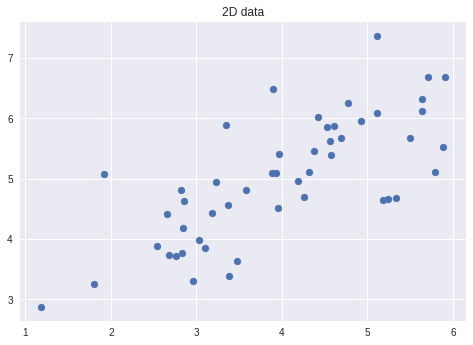

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#first experiment with an example 2D
#ataset to get intuition on how PCA works, and then use it on a bigger
#dataset of 5000 face image dataset


mat = scipy.io.loadmat('2Dsamples.mat')
data = pd.DataFrame(mat['X'])
plt.scatter(data.loc[:,0],data.loc[:,1])
plt.title('2D data')
plt.show()

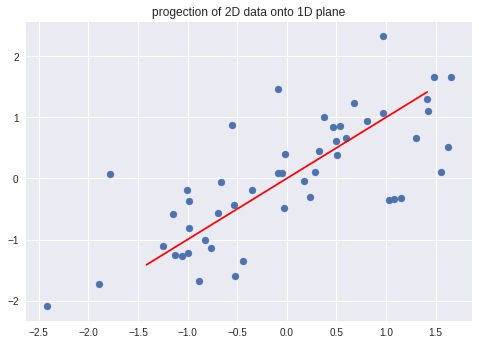

In [3]:
norm_data=StandardScaler().fit_transform(data)


pca = PCA(n_components=1,svd_solver='randomized', iterated_power = 3000)
model =pca.fit(norm_data)
data_1d = model.transform(norm_data)
V = model.components_
plt.scatter(norm_data[:,0],norm_data[:,1])
x_pca_axis, y_pca_axis = 2 * V.T
x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
plt.plot(x_pca_plane, y_pca_plane, color='r')
plt.title('progection of 2D data onto 1D plane')
plt.show()

In [0]:
#helper functions for drawing faces
def visual(dataset, i):
  one_pic = dataset[i,:]
  pic = one_pic.reshape((32,32))
  return pic.T


def build_row(dataset,n,m):
  row = visual(dataset, n)
  for i in range(n, m):
      row = np.concatenate((row,visual(dataset,i+1)),axis=1)
  return row

def build_col(dataset, n):
  col = build_row(dataset,0,10)
  for i in range(1, n):
      col = np.concatenate((col,build_row(dataset,i*10,(i+1)*10)),axis = 0)
  return col


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


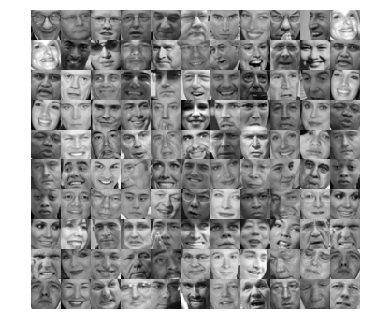

In [13]:

mat = scipy.io.loadmat('photo_faces.mat')
face = pd.DataFrame(mat['X'])
faces = np.array(face.loc[:100,:])

pic = build_col(faces, 10)
img = scipy.misc.toimage(pic)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [0]:
norm_faces=StandardScaler().fit_transform(faces)
pca_faces = PCA(n_components=100)
model_faces =pca_faces.fit(norm_faces)
faces_1d = model_faces.transform(norm_faces)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


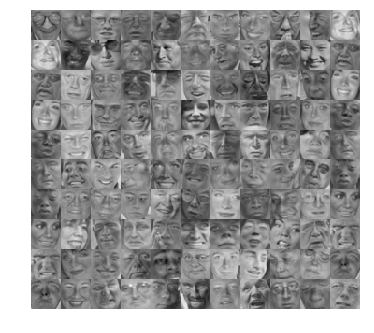

In [15]:
new_faces = model_faces.inverse_transform(faces_1d)

pic = build_col(new_faces, 10)
img = scipy.misc.toimage(pic)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [0]:
norm_faces=StandardScaler().fit_transform(faces)
pca_faces = PCA(n_components=10)
model_faces =pca_faces.fit(norm_faces)
faces_1d = model_faces.transform(norm_faces)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


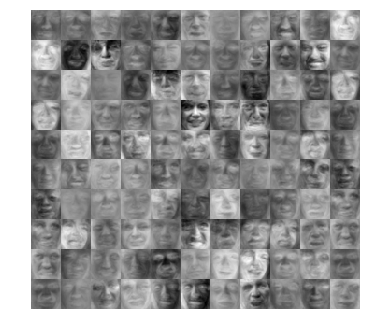

In [17]:
new_faces = model_faces.inverse_transform(faces_1d)

pic = build_col(new_faces, 10)
img = scipy.misc.toimage(pic)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()